Epoch [10/100], Loss: 0.1247
Epoch [20/100], Loss: 0.0629
Epoch [30/100], Loss: 0.0680
Epoch [40/100], Loss: 0.0658
Epoch [50/100], Loss: 0.0605
Epoch [60/100], Loss: 0.0574
Epoch [70/100], Loss: 0.0567
Epoch [80/100], Loss: 0.0562
Epoch [90/100], Loss: 0.0557
Epoch [100/100], Loss: 0.0554
Accuracy: 99.00%


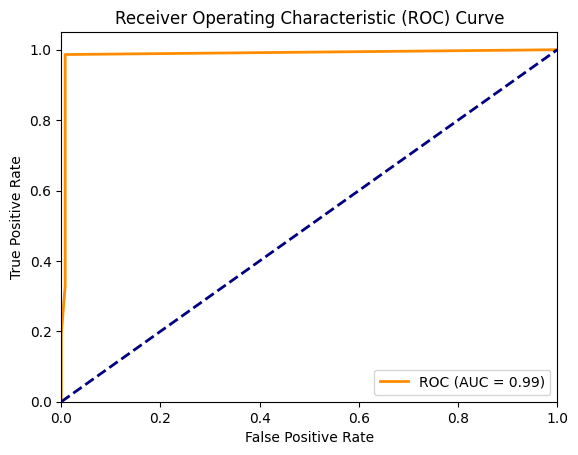

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Définition du modèle GNN
class GraphConvolutionLayer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GraphConvolutionLayer, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, adj_matrix, node_features):
        support = torch.matmul(adj_matrix, node_features)
        output = self.linear(support)
        return output


class GraphNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphNeuralNetwork, self).__init__()
        self.conv1 = GraphConvolutionLayer(input_dim, hidden_dim)
        self.conv2 = GraphConvolutionLayer(hidden_dim, output_dim)

    def forward(self, adj_matrix, node_features):
        h1 = torch.relu(self.conv1(adj_matrix, node_features))
        h2 = self.conv2(adj_matrix, h1)
        return h2


# Lecture du dataset à partir du fichier CSV
def read_dataset(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Ignorer la première ligne (en-tête)
    lines = lines[1:]

    dataset = []
    for line in lines:
        values = line.strip().split(',')
        features = list(map(float, values[:-1]))

        label = values[-1]
        dataset.append((features, label))

    return dataset


# Préparation des données pour l'entraînement
def prepare_data(dataset):
    features = [data[0] for data in dataset]
    labels = [data[1] for data in dataset]

    # Conversion en tenseurs PyTorch
    x = torch.tensor(features, dtype=torch.float32)
    y = torch.tensor(LabelEncoder().fit_transform(labels))  # Encodage one-hot

    # Normalisation des fonctionnalités
    x = (x - x.mean(dim=0)) / x.std(dim=0)

    return x, y


# Division du dataset en ensembles d'entraînement et de test
def split_dataset(dataset, test_size=0.2, random_state=42):
    features, labels = zip(*dataset)
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_state)
    train_dataset = list(zip(x_train, y_train))
    test_dataset = list(zip(x_test, y_test))
    return train_dataset, test_dataset


# Entraînement du modèle
def train_model(model, train_dataset, num_epochs, learning_rate):
    x_train, y_train = prepare_data(train_dataset)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(torch.eye(x_train.size(0)), x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))


# Évaluation du modèle
def evaluate_model(model, test_dataset):
    x_test, y_test = prepare_data(test_dataset)

    with torch.no_grad():
        outputs = model(torch.eye(x_test.size(0)), x_test)
        _, predicted = torch.max(outputs.data, 1)

    y_pred = predicted.numpy()
    y_true = y_test.numpy()

    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))


# Chargement du dataset
dataset = read_dataset('graph2.csv')

# Division du dataset en ensembles d'entraînement et de test
train_dataset, test_dataset = split_dataset(dataset)

# Définition des dimensions d'entrée, cachée et de sortie du GNN
input_dim = len(dataset[0][0])
hidden_dim = 32
output_dim = 2

# Création du modèle GNN
model = GraphNeuralNetwork(input_dim, hidden_dim, output_dim)

# Entraînement du modèle
num_epochs = 100
learning_rate = 0.01
train_model(model, train_dataset, num_epochs, learning_rate)

# Évaluation du modèle
evaluate_model(model, test_dataset)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Préparation des données de test
x_test, y_test = prepare_data(test_dataset)




# Calcul des taux de faux positifs et des taux de vrais positif
# Préparation des données de test
x_test, y_test = prepare_data(test_dataset)

# Calcul des scores de probabilité
with torch.no_grad():
    outputs = model(torch.eye(x_test.size(0)), x_test)
    prob_scores = torch.softmax(outputs, dim=1)
    prob_scores = prob_scores[:, 1].numpy()  # Utilisez les scores de la classe positive

# Calcul des taux de faux positifs et des taux de vrais positifs
fpr, tpr, _ = roc_curve(y_test.numpy(), prob_scores)

# Calcul de l'aire sous la courbe ROC
roc_auc = auc(fpr, tpr)



# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()





In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Définition du modèle GNN
class GraphConvolutionLayer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GraphConvolutionLayer, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, adj_matrix, node_features):
        support = torch.matmul(adj_matrix, node_features)
        output = self.linear(support)
        return output


class GraphNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphNeuralNetwork, self).__init__()
        self.conv1 = GraphConvolutionLayer(input_dim, hidden_dim)
        self.conv2 = GraphConvolutionLayer(hidden_dim, output_dim)

    def forward(self, adj_matrix, node_features):
        h1 = torch.relu(self.conv1(adj_matrix, node_features))
        h2 = self.conv2(adj_matrix, h1)
        return h2


# Lecture du dataset à partir du fichier CSV
def read_dataset(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Ignorer la première ligne (en-tête)
    lines = lines[1:]

    dataset = []
    for line in lines:
        values = line.strip().split(',')
        features = list(map(int, values[:-1]))
        label = values[-1]
        dataset.append((features, label))

    return dataset


# Préparation des données pour l'entraînement
def prepare_data(dataset):
    features = [data[0] for data in dataset]
    labels = [data[1] for data in dataset]

    # Conversion en tenseurs PyTorch
    x = torch.tensor(features, dtype=torch.float32)
    y = torch.tensor(LabelEncoder().fit_transform(labels))  # Encodage one-hot

    # Normalisation des fonctionnalités
    x = (x - x.mean(dim=0)) / x.std(dim=0)

    return x, y


# Division du dataset en ensembles d'entraînement et de test
def split_dataset(dataset, test_size=0.2, random_state=42):
    features, labels = zip(*dataset)
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_state)
    train_dataset = list(zip(x_train, y_train))
    test_dataset = list(zip(x_test, y_test))
    return train_dataset, test_dataset


# Entraînement du modèle
def train_model(model, train_dataset, num_epochs, learning_rate):
    x_train, y_train = prepare_data(train_dataset)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(torch.eye(x_train.size(0)), x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))


# Évaluation du modèle
def evaluate_model(model, test_dataset):
    x_test, y_test = prepare_data(test_dataset)

    with torch.no_grad():
        outputs = model(torch.eye(x_test.size(0)), x_test)
        _, predicted = torch.max(outputs.data, 1)

    y_pred = predicted.numpy()
    y_true = y_test.numpy()

    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))


# Chargement du dataset
dataset = read_dataset('bipartite.csv')

# Division du dataset en ensembles d'entraînement et de test
train_dataset, test_dataset = split_dataset(dataset)

# Définition des dimensions d'entrée, cachée et de sortie du GNN
input_dim = len(dataset[0][0])
hidden_dim = 32
output_dim = 2

# Création du modèle GNN
model = GraphNeuralNetwork(input_dim, hidden_dim, output_dim)

# Entraînement du modèle
num_epochs = 100
learning_rate = 0.01
train_model(model, train_dataset, num_epochs, learning_rate)

# Évaluation du modèle
evaluate_model(model, test_dataset)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Préparation des données de test
x_test, y_test = prepare_data(test_dataset)

# Calcul des scores de probabilité
with torch.no_grad():
    outputs = model(torch.eye(x_test.size(0)), x_test)
    prob_scores = torch.softmax(outputs, dim=1)
    prob_scores = prob_scores[:, 1].numpy()  # Utilisez les scores de la classe positive


# Calcul des taux de faux positifs et des taux de vrais positifs
fpr, tpr, _ = roc_curve(y_test, prob_scores)

# Calcul de l'aire sous la courbe ROC
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




FileNotFoundError: ignored

Epoch [10/100], Loss: 0.3024
Epoch [20/100], Loss: 0.1078
Epoch [30/100], Loss: 0.0430
Epoch [40/100], Loss: 0.0209
Epoch [50/100], Loss: 0.0130
Epoch [60/100], Loss: 0.0090
Epoch [70/100], Loss: 0.0060
Epoch [80/100], Loss: 0.0040
Epoch [90/100], Loss: 0.0028
Epoch [100/100], Loss: 0.0022
Accuracy: 100.00%


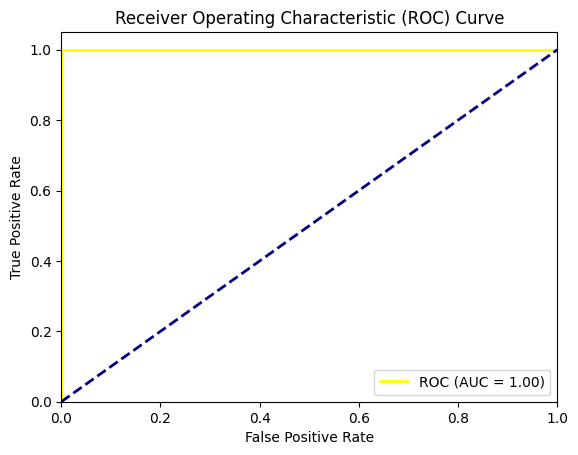

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Définition du modèle GNN
class GraphConvolutionLayer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GraphConvolutionLayer, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, adj_matrix, node_features):
        support = torch.matmul(adj_matrix, node_features)
        output = self.linear(support)
        return output


class GraphNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphNeuralNetwork, self).__init__()
        self.conv1 = GraphConvolutionLayer(input_dim, hidden_dim)
        self.conv2 = GraphConvolutionLayer(hidden_dim, output_dim)

    def forward(self, adj_matrix, node_features):
        h1 = torch.relu(self.conv1(adj_matrix, node_features))
        h2 = self.conv2(adj_matrix, h1)
        return h2


# Lecture du dataset à partir du fichier CSV
def read_dataset(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Ignorer la première ligne (en-tête)
    lines = lines[1:]

    dataset = []
    for line in lines:
        values = line.strip().split(',')
        features = list(map(int, values[:-1]))
        label = values[-1]
        dataset.append((features, label))

    return dataset


# Préparation des données pour l'entraînement
def prepare_data(dataset):
    features = [data[0] for data in dataset]
    labels = [data[1] for data in dataset]

    # Conversion en tenseurs PyTorch
    x = torch.tensor(features, dtype=torch.float32)
    y = torch.tensor(LabelEncoder().fit_transform(labels))  # Encodage one-hot

    # Normalisation des fonctionnalités
    x = (x - x.mean(dim=0)) / x.std(dim=0)

    return x, y


# Division du dataset en ensembles d'entraînement et de test
def split_dataset(dataset, test_size=0.2, random_state=42):
    features, labels = zip(*dataset)
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_state)
    train_dataset = list(zip(x_train, y_train))
    test_dataset = list(zip(x_test, y_test))
    return train_dataset, test_dataset


# Entraînement du modèle
def train_model(model, train_dataset, num_epochs, learning_rate):
    x_train, y_train = prepare_data(train_dataset)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(torch.eye(x_train.size(0)), x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))


# Évaluation du modèle
def evaluate_model(model, test_dataset):
    x_test, y_test = prepare_data(test_dataset)

    with torch.no_grad():
        outputs = model(torch.eye(x_test.size(0)), x_test)
        _, predicted = torch.max(outputs.data, 1)

    y_pred = predicted.numpy()
    y_true = y_test.numpy()

    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))


# Chargement du dataset
dataset = read_dataset('complete.csv')

# Division du dataset en ensembles d'entraînement et de test
train_dataset, test_dataset = split_dataset(dataset)

# Définition des dimensions d'entrée, cachée et de sortie du GNN
input_dim = len(dataset[0][0])
hidden_dim = 32
output_dim = 2

# Création du modèle GNN
model = GraphNeuralNetwork(input_dim, hidden_dim, output_dim)

# Entraînement du modèle
num_epochs = 100
learning_rate = 0.01
train_model(model, train_dataset, num_epochs, learning_rate)

# Évaluation du modèle
evaluate_model(model, test_dataset)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Préparation des données de test
x_test, y_test = prepare_data(test_dataset)

# Calcul des scores de probabilité
with torch.no_grad():
    outputs = model(torch.eye(x_test.size(0)), x_test)
    prob_scores = torch.softmax(outputs, dim=1)
    prob_scores = prob_scores[:, 1].numpy()  # Utilisez les scores de la classe positive


# Calcul des taux de faux positifs et des taux de vrais positifs
fpr, tpr, _ = roc_curve(y_test, prob_scores)

# Calcul de l'aire sous la courbe ROC
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='yellow', lw=2, label='ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




Epoch [10/100], Loss: 0.1480
Epoch [20/100], Loss: 0.0626
Epoch [30/100], Loss: 0.0570
Epoch [40/100], Loss: 0.0577
Epoch [50/100], Loss: 0.0571
Epoch [60/100], Loss: 0.0559
Epoch [70/100], Loss: 0.0549
Epoch [80/100], Loss: 0.0542
Epoch [90/100], Loss: 0.0537
Epoch [100/100], Loss: 0.0533
Accuracy: 99.00%
Epoch [10/100], Loss: 0.1363
Epoch [20/100], Loss: 0.0528
Epoch [30/100], Loss: 0.0549
Epoch [40/100], Loss: 0.0538
Epoch [50/100], Loss: 0.0507
Epoch [60/100], Loss: 0.0484
Epoch [70/100], Loss: 0.0472
Epoch [80/100], Loss: 0.0467
Epoch [90/100], Loss: 0.0465
Epoch [100/100], Loss: 0.0464
Accuracy: 99.00%
Epoch [10/100], Loss: 0.3272
Epoch [20/100], Loss: 0.1181
Epoch [30/100], Loss: 0.0504
Epoch [40/100], Loss: 0.0268
Epoch [50/100], Loss: 0.0181
Epoch [60/100], Loss: 0.0139
Epoch [70/100], Loss: 0.0118
Epoch [80/100], Loss: 0.0104
Epoch [90/100], Loss: 0.0093
Epoch [100/100], Loss: 0.0082
Accuracy: 100.00%


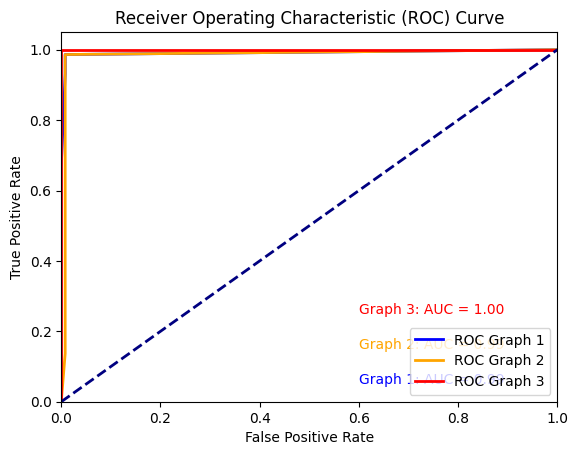

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Définition du modèle GNN
class GraphConvolutionLayer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GraphConvolutionLayer, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, adj_matrix, node_features):
        support = torch.matmul(adj_matrix, node_features)
        output = self.linear(support)
        return output


class GraphNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphNeuralNetwork, self).__init__()
        self.conv1 = GraphConvolutionLayer(input_dim, hidden_dim)
        self.conv2 = GraphConvolutionLayer(hidden_dim, output_dim)

    def forward(self, adj_matrix, node_features):
        h1 = torch.relu(self.conv1(adj_matrix, node_features))
        h2 = self.conv2(adj_matrix, h1)
        return h2


# Lecture du dataset à partir du fichier CSV
def read_dataset(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Ignorer la première ligne (en-tête)
    lines = lines[1:]

    dataset = []
    for line in lines:
        values = line.strip().split(',')
        features = list(map(int, values[:-1]))
        label = values[-1]
        dataset.append((features, label))

    return dataset


# Préparation des données pour l'entraînement
def prepare_data(dataset):
    features = [data[0] for data in dataset]
    labels = [data[1] for data in dataset]

    # Conversion en tenseurs PyTorch
    x = torch.tensor(features, dtype=torch.float32)
    y = torch.tensor(LabelEncoder().fit_transform(labels))  # Encodage one-hot

    # Normalisation des fonctionnalités
    x = (x - x.mean(dim=0)) / x.std(dim=0)

    return x, y


# Division du dataset en ensembles d'entraînement et de test
def split_dataset(dataset, test_size=0.2, random_state=42):
    features, labels = zip(*dataset)
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_state)
    train_dataset = list(zip(x_train, y_train))
    test_dataset = list(zip(x_test, y_test))
    return train_dataset, test_dataset


# Entraînement du modèle
def train_model(model, train_dataset, num_epochs, learning_rate):
    x_train, y_train = prepare_data(train_dataset)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(torch.eye(x_train.size(0)), x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))


# Évaluation du modèle
def evaluate_model(model, test_dataset):
    x_test, y_test = prepare_data(test_dataset)

    with torch.no_grad():
        outputs = model(torch.eye(x_test.size(0)), x_test)
        _, predicted = torch.max(outputs.data, 1)

    y_pred = predicted.numpy()
    y_true = y_test.numpy()

    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))


# Chargement des datasets
datasets = ['bipartite.csv', 'graph2.csv', 'complete.csv']
colors = ['blue', 'orange', 'red']
auc_scores = []

plt.figure()

for i, dataset in enumerate(datasets):
    # Chargement du dataset
    dataset = read_dataset(dataset)

    # Division du dataset en ensembles d'entraînement et de test
    train_dataset, test_dataset = split_dataset(dataset)

    # Définition des dimensions d'entrée, cachée et de sortie du GNN
    input_dim = len(dataset[0][0])
    hidden_dim = 32
    output_dim = 2

    # Création du modèle GNN
    model = GraphNeuralNetwork(input_dim, hidden_dim, output_dim)

    # Entraînement du modèle
    num_epochs = 100
    learning_rate = 0.01
    train_model(model, train_dataset, num_epochs, learning_rate)

    # Évaluation du modèle
    evaluate_model(model, test_dataset)

    # Préparation des données de test
    x_test, y_test = prepare_data(test_dataset)

    # Calcul des scores de probabilité
    with torch.no_grad():
        outputs = model(torch.eye(x_test.size(0)), x_test)
        prob_scores = torch.softmax(outputs, dim=1)
        prob_scores = prob_scores[:, 1].numpy()  # Utilisez les scores de la classe positive

    # Calcul des taux de faux positifs et des taux de vrais positifs
    fpr, tpr, _ = roc_curve(y_test, prob_scores)

    # Calcul de l'aire sous la courbe ROC
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    # Affichage de la courbe ROC
    plt.plot(fpr, tpr, color=colors[i], lw=2, label='ROC Graph {}'.format(i+1))

# Affichage des légendes, axes, et AUCs
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

for i, auc_score in enumerate(auc_scores):
    plt.text(0.6, 0.05 + i * 0.1, 'Graph {}: AUC = {:.2f}'.format(i+1, auc_score), color=colors[i])

plt.show()


Epoch [10/100], Loss: 0.1754
Epoch [20/100], Loss: 0.0578
Epoch [30/100], Loss: 0.0568
Epoch [40/100], Loss: 0.0564
Epoch [50/100], Loss: 0.0528
Epoch [60/100], Loss: 0.0499
Epoch [70/100], Loss: 0.0487
Epoch [80/100], Loss: 0.0482
Epoch [90/100], Loss: 0.0477
Epoch [100/100], Loss: 0.0473
Accuracy: 99.00%
Epoch [10/100], Loss: 0.2802
Epoch [20/100], Loss: 0.1007
Epoch [30/100], Loss: 0.0602
Epoch [40/100], Loss: 0.0557
Epoch [50/100], Loss: 0.0558
Epoch [60/100], Loss: 0.0557
Epoch [70/100], Loss: 0.0552
Epoch [80/100], Loss: 0.0546
Epoch [90/100], Loss: 0.0541
Epoch [100/100], Loss: 0.0537
Accuracy: 99.00%
Epoch [10/100], Loss: 0.2944
Epoch [20/100], Loss: 0.0956
Epoch [30/100], Loss: 0.0329
Epoch [40/100], Loss: 0.0160
Epoch [50/100], Loss: 0.0102
Epoch [60/100], Loss: 0.0068
Epoch [70/100], Loss: 0.0040
Epoch [80/100], Loss: 0.0024
Epoch [90/100], Loss: 0.0016
Epoch [100/100], Loss: 0.0012
Accuracy: 100.00%


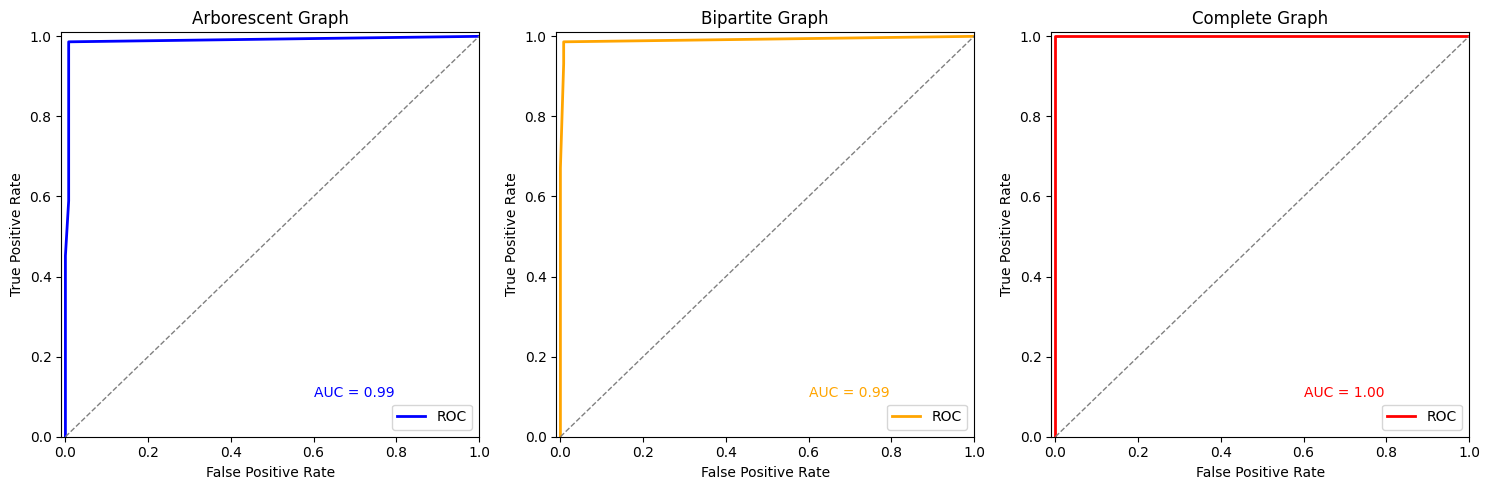

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Définition du modèle GNN
class GraphConvolutionLayer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GraphConvolutionLayer, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, adj_matrix, node_features):
        support = torch.matmul(adj_matrix, node_features)
        output = self.linear(support)
        return output


class GraphNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphNeuralNetwork, self).__init__()
        self.conv1 = GraphConvolutionLayer(input_dim, hidden_dim)
        self.conv2 = GraphConvolutionLayer(hidden_dim, output_dim)

    def forward(self, adj_matrix, node_features):
        h1 = torch.relu(self.conv1(adj_matrix, node_features))
        h2 = self.conv2(adj_matrix, h1)
        return h2


# Lecture du dataset à partir du fichier CSV
def read_dataset(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Ignorer la première ligne (en-tête)
    lines = lines[1:]

    dataset = []
    for line in lines:
        values = line.strip().split(',')
        features = list(map(int, values[:-1]))
        label = values[-1]
        dataset.append((features, label))

    return dataset


# Préparation des données pour l'entraînement
def prepare_data(dataset):
    features = [data[0] for data in dataset]
    labels = [data[1] for data in dataset]

    # Conversion en tenseurs PyTorch
    x = torch.tensor(features, dtype=torch.float32)
    y = torch.tensor(LabelEncoder().fit_transform(labels))  # Encodage one-hot

    # Normalisation des fonctionnalités
    x = (x - x.mean(dim=0)) / x.std(dim=0)

    return x, y


# Division du dataset en ensembles d'entraînement et de test
def split_dataset(dataset, test_size=0.2, random_state=42):
    features, labels = zip(*dataset)
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_state)
    train_dataset = list(zip(x_train, y_train))
    test_dataset = list(zip(x_test, y_test))
    return train_dataset, test_dataset


# Entraînement du modèle
def train_model(model, train_dataset, num_epochs, learning_rate):
    x_train, y_train = prepare_data(train_dataset)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(torch.eye(x_train.size(0)), x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))


# Évaluation du modèle
def evaluate_model(model, test_dataset):
    x_test, y_test = prepare_data(test_dataset)

    with torch.no_grad():
        outputs = model(torch.eye(x_test.size(0)), x_test)
        _, predicted = torch.max(outputs.data, 1)

    y_pred = predicted.numpy()
    y_true = y_test.numpy()

    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))


# Chargement des datasets
datasets = ['graph2.csv', 'bipartite.csv', 'complete.csv']
graph_names = ['Arborescent Graph', 'Bipartite Graph', 'Complete Graph']
colors = ['blue', 'orange', 'red']
auc_scores = []

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, dataset in enumerate(datasets):
    ax = axes[i]

    # Chargement du dataset
    dataset = read_dataset(dataset)

    # Division du dataset en ensembles d'entraînement et de test
    train_dataset, test_dataset = split_dataset(dataset)

    # Définition des dimensions d'entrée, cachée et de sortie du GNN
    input_dim = len(dataset[0][0])
    hidden_dim = 32
    output_dim = 2

    # Création du modèle GNN
    model = GraphNeuralNetwork(input_dim, hidden_dim, output_dim)

    # Entraînement du modèle
    num_epochs = 100
    learning_rate = 0.01
    train_model(model, train_dataset, num_epochs, learning_rate)

    # Évaluation du modèle
    evaluate_model(model, test_dataset)

    # Préparation des données de test
    x_test, y_test = prepare_data(test_dataset)

    # Calcul des scores de probabilité
    with torch.no_grad():
        outputs = model(torch.eye(x_test.size(0)), x_test)
        prob_scores = torch.softmax(outputs, dim=1)
        prob_scores = prob_scores[:, 1].numpy()  # Utilisez les scores de la classe positive

    # Calcul des taux de faux positifs et des taux de vrais positifs
    fpr, tpr, _ = roc_curve(y_test, prob_scores)

    # Calcul de l'aire sous la courbe ROC
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    # Affichage de la courbe ROC avec une couleur personnalisée
    ax.plot(fpr, tpr, color=colors[i], lw=2, label='ROC')
    ax.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    ax.set_xlim([-0.01, 1.0])
    ax.set_ylim([0.0, 1.01])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(graph_names[i])
    ax.legend(loc="lower right")

    # Affichage de l'AUC
    ax.text(0.6, 0.1, 'AUC = {:.2f}'.format(roc_auc), color=colors[i])

plt.tight_layout()
plt.show()


In [ ]:
!pip install torch
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910459 sha256=f5abf8644d3a703cef3af594fda10c574b92fc3a8fb6407cd2e7b6e17ac93b69
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch-geometric


Epoch [10/100], Loss: 0.1664
Epoch [20/100], Loss: 0.0696
Epoch [30/100], Loss: 0.0578
Epoch [40/100], Loss: 0.0569
Epoch [50/100], Loss: 0.0566
Epoch [60/100], Loss: 0.0559
Epoch [70/100], Loss: 0.0552
Epoch [80/100], Loss: 0.0545
Epoch [90/100], Loss: 0.0541
Epoch [100/100], Loss: 0.0537
Accuracy: 99.00%
Recall: 0.99
F1-score: 0.99
Epoch [10/100], Loss: 0.1634
Epoch [20/100], Loss: 0.0653
Epoch [30/100], Loss: 0.0681
Epoch [40/100], Loss: 0.0654
Epoch [50/100], Loss: 0.0595
Epoch [60/100], Loss: 0.0560
Epoch [70/100], Loss: 0.0551
Epoch [80/100], Loss: 0.0547
Epoch [90/100], Loss: 0.0543
Epoch [100/100], Loss: 0.0540
Accuracy: 99.00%
Recall: 0.99
F1-score: 0.99
Epoch [10/100], Loss: 0.2654
Epoch [20/100], Loss: 0.0934
Epoch [30/100], Loss: 0.0420
Epoch [40/100], Loss: 0.0230
Epoch [50/100], Loss: 0.0156
Epoch [60/100], Loss: 0.0120
Epoch [70/100], Loss: 0.0096
Epoch [80/100], Loss: 0.0077
Epoch [90/100], Loss: 0.0061
Epoch [100/100], Loss: 0.0048
Accuracy: 100.00%
Recall: 1.00
F1-sco

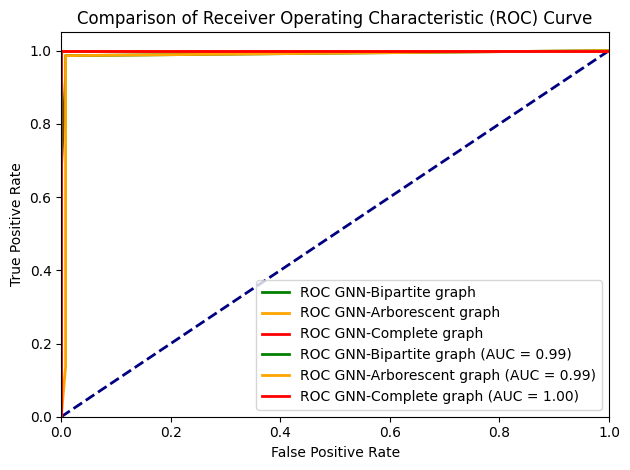

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Définition du modèle GNN
class GraphConvolutionLayer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GraphConvolutionLayer, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, adj_matrix, node_features):
        support = torch.matmul(adj_matrix, node_features)
        output = self.linear(support)
        return output


class GraphNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphNeuralNetwork, self).__init__()
        self.conv1 = GraphConvolutionLayer(input_dim, hidden_dim)
        self.conv2 = GraphConvolutionLayer(hidden_dim, output_dim)

    def forward(self, adj_matrix, node_features):
        h1 = torch.relu(self.conv1(adj_matrix, node_features))
        h2 = self.conv2(adj_matrix, h1)
        return h2


# Lecture du dataset à partir du fichier CSV
def read_dataset(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Ignorer la première ligne (en-tête)
    lines = lines[1:]

    dataset = []
    for line in lines:
        values = line.strip().split(',')
        features = list(map(int, values[:-1]))
        label = values[-1]
        dataset.append((features, label))

    return dataset


# Préparation des données pour l'entraînement
def prepare_data(dataset):
    features = [data[0] for data in dataset]
    labels = [data[1] for data in dataset]

    # Conversion en tenseurs PyTorch
    x = torch.tensor(features, dtype=torch.float32)
    y = torch.tensor(LabelEncoder().fit_transform(labels))  # Encodage one-hot

    # Normalisation des fonctionnalités
    x = (x - x.mean(dim=0)) / x.std(dim=0)

    return x, y


# Division du dataset en ensembles d'entraînement et de test
def split_dataset(dataset, test_size=0.2, random_state=42):
    features, labels = zip(*dataset)
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_state)
    train_dataset = list(zip(x_train, y_train))
    test_dataset = list(zip(x_test, y_test))
    return train_dataset, test_dataset


# Entraînement du modèle
def train_model(model, train_dataset, num_epochs, learning_rate):
    x_train, y_train = prepare_data(train_dataset)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(torch.eye(x_train.size(0)), x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))


# Évaluation du modèle
def evaluate_model(model, test_dataset):
    x_test, y_test = prepare_data(test_dataset)

    with torch.no_grad():
        outputs = model(torch.eye(x_test.size(0)), x_test)
        _, predicted = torch.max(outputs.data, 1)

    y_pred = predicted.numpy()
    y_true = y_test.numpy()

    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))


    # Calculate Recall and F1-score
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print('Recall: {:.2f}'.format(recall))
    print('F1-score: {:.2f}'.format(f1))




# Chargement des datasets
datasets = ['bipartite.csv', 'graph2.csv', 'complete.csv',]
graph_names = ['GNN-Bipartite graph', 'GNN-Arborescent graph', 'GNN-Complete graph','CNN']
colors = ['green', 'orange', 'red','blue']
auc_scores = []

plt.figure()

for i, dataset in enumerate(datasets):
    # Chargement du dataset
    dataset = read_dataset(dataset)

    # Division du dataset en ensembles d'entraînement et de test
    train_dataset, test_dataset = split_dataset(dataset)

    # Définition des dimensions d'entrée, cachée et de sortie du GNN
    input_dim = len(dataset[0][0])
    hidden_dim = 32
    output_dim = 2

    # Création du modèle GNN
    model = GraphNeuralNetwork(input_dim, hidden_dim, output_dim)

    # Entraînement du modèle
    num_epochs = 100
    learning_rate = 0.01
    train_model(model, train_dataset, num_epochs, learning_rate)

    # Évaluation du modèle
    evaluate_model(model, test_dataset)



    # Préparation des données de test
    x_test, y_test = prepare_data(test_dataset)

    # Calcul des scores de probabilité
    with torch.no_grad():
        outputs = model(torch.eye(x_test.size(0)), x_test)
        prob_scores = torch.softmax(outputs, dim=1)
        prob_scores = prob_scores[:, 1].numpy()  # Utilisez les scores de la classe positive

    # Calcul des taux de faux positifs et des taux de vrais positifs
    fpr, tpr, _ = roc_curve(y_test, prob_scores)

    # Calcul de l'aire sous la courbe ROC
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    # Affichage de la courbe ROC avec le nom du graphe dans la légende
    plt.plot(fpr, tpr, color=colors[i], lw=2, label='ROC {}'.format(graph_names[i]))

# ... (previous code remains the same)

# Affichage des légendes, axes, et AUCs
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of Receiver Operating Characteristic (ROC) Curve')

# Plotting ROC curves and AUC scores
for i, auc_score in enumerate(auc_scores):
    plt.plot(fpr, tpr, color=colors[i], lw=2, label='ROC {} (AUC = {:.2f})'.format(graph_names[i], auc_score))

# Creating the legend inside the plot area
plt.legend(loc='lower right')

plt.tight_layout()  # To adjust the spacing and avoid overlapping
plt.show()



Epoch [10/100], Loss: 0.2382
Epoch [20/100], Loss: 0.0831
Epoch [30/100], Loss: 0.0579
Epoch [40/100], Loss: 0.0561
Epoch [50/100], Loss: 0.0562
Epoch [60/100], Loss: 0.0558
Epoch [70/100], Loss: 0.0553
Epoch [80/100], Loss: 0.0547
Epoch [90/100], Loss: 0.0542
Epoch [100/100], Loss: 0.0538
Accuracy: 99.00%
Epoch [10/100], Loss: 0.1705
Epoch [20/100], Loss: 0.0625
Epoch [30/100], Loss: 0.0665
Epoch [40/100], Loss: 0.0641
Epoch [50/100], Loss: 0.0584
Epoch [60/100], Loss: 0.0551
Epoch [70/100], Loss: 0.0541
Epoch [80/100], Loss: 0.0538
Epoch [90/100], Loss: 0.0535
Epoch [100/100], Loss: 0.0533
Accuracy: 99.00%
Epoch [10/100], Loss: 0.2295
Epoch [20/100], Loss: 0.0961
Epoch [30/100], Loss: 0.0445
Epoch [40/100], Loss: 0.0255
Epoch [50/100], Loss: 0.0170
Epoch [60/100], Loss: 0.0119
Epoch [70/100], Loss: 0.0080
Epoch [80/100], Loss: 0.0053
Epoch [90/100], Loss: 0.0037
Epoch [100/100], Loss: 0.0028
Accuracy: 100.00%


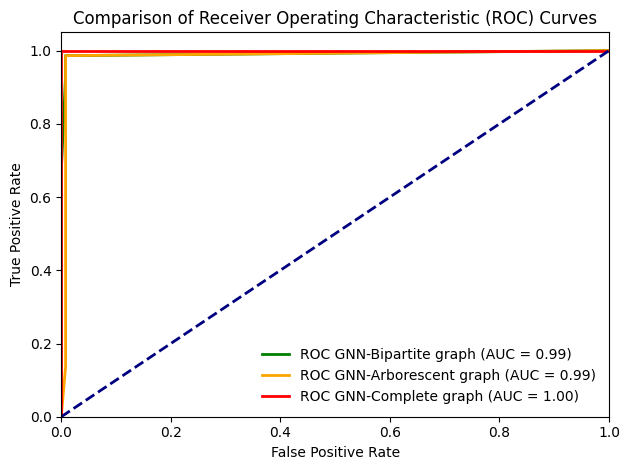

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# ... (previous code remains the same)

plt.figure()

for i, dataset in enumerate(datasets):
    # Chargement du dataset
    dataset = read_dataset(dataset)

    # Division du dataset en ensembles d'entraînement et de test
    train_dataset, test_dataset = split_dataset(dataset)

    # Définition des dimensions d'entrée, cachée et de sortie du GNN
    input_dim = len(dataset[0][0])
    hidden_dim = 32
    output_dim = 2

    # Création du modèle GNN
    model = GraphNeuralNetwork(input_dim, hidden_dim, output_dim)

    # Entraînement du modèle
    num_epochs = 100
    learning_rate = 0.01
    train_model(model, train_dataset, num_epochs, learning_rate)

    # Évaluation du modèle
    evaluate_model(model, test_dataset)

    # Préparation des données de test
    x_test, y_test = prepare_data(test_dataset)

    # Calcul des scores de probabilité
    with torch.no_grad():
        outputs = model(torch.eye(x_test.size(0)), x_test)
        prob_scores = torch.softmax(outputs, dim=1)
        prob_scores = prob_scores[:, 1].numpy()  # Utilisez les scores de la classe positive

    # Calcul des taux de faux positifs et des taux de vrais positifs
    fpr, tpr, _ = roc_curve(y_test, prob_scores)

    # Calcul de l'aire sous la courbe ROC
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    # Affichage de la courbe ROC avec le nom du graphe dans la légende
    plt.plot(fpr, tpr, color=colors[i], lw=2, label='ROC {} (AUC = {:.2f})'.format(graph_names[i], roc_auc))

# ... (previous code remains the same)

# Affichage des légendes, axes, et AUCs
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of Receiver Operating Characteristic (ROC) Curves')

# Creating the legend inside the plot area
plt.legend(loc='lower right', frameon=False)

plt.tight_layout()  # To adjust the spacing and avoid overlapping
plt.show()


Epoch [10/100], Loss: 0.2391
Epoch [20/100], Loss: 0.0775
Epoch [30/100], Loss: 0.0544
Epoch [40/100], Loss: 0.0540
Epoch [50/100], Loss: 0.0544
Epoch [60/100], Loss: 0.0539
Epoch [70/100], Loss: 0.0532
Epoch [80/100], Loss: 0.0527
Epoch [90/100], Loss: 0.0524
Epoch [100/100], Loss: 0.0522
Accuracy: 99.00%
Epoch [10/100], Loss: 0.1599
Epoch [20/100], Loss: 0.0694
Epoch [30/100], Loss: 0.0707
Epoch [40/100], Loss: 0.0676
Epoch [50/100], Loss: 0.0615
Epoch [60/100], Loss: 0.0572
Epoch [70/100], Loss: 0.0558
Epoch [80/100], Loss: 0.0553
Epoch [90/100], Loss: 0.0547
Epoch [100/100], Loss: 0.0544
Accuracy: 99.00%
Epoch [10/100], Loss: 0.2567
Epoch [20/100], Loss: 0.0976
Epoch [30/100], Loss: 0.0429
Epoch [40/100], Loss: 0.0246
Epoch [50/100], Loss: 0.0174
Epoch [60/100], Loss: 0.0133
Epoch [70/100], Loss: 0.0098
Epoch [80/100], Loss: 0.0068
Epoch [90/100], Loss: 0.0047
Epoch [100/100], Loss: 0.0034
Accuracy: 100.00%


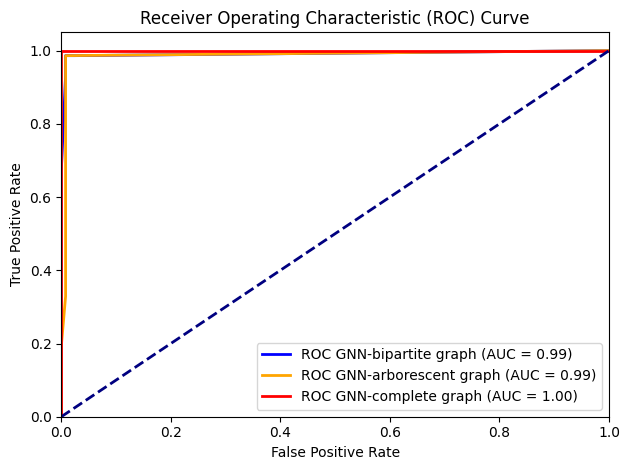

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

<ipython-input-25-3bbb6e28884a>:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_train[y_train == "Normal"] = 0
<ipython-input-25-3bbb6e28884a>:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_train[y_train == "Critical"] = 1
<ipython-input-25-3bbb6e28884a>:144: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_test[y_test == "Normal"] = 0
<ipython-input-25-3bbb6e28884a>:145: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_test[y_test == "Critical"] = 1


Epoch 1/10
469/469 [==============================] - 193s 410ms/step - loss: 2.2751 - accuracy: 0.1600 - val_loss: 2.2355 - val_accuracy: 0.3104
Epoch 2/10
469/469 [==============================] - 191s 407ms/step - loss: 2.2124 - accuracy: 0.2753 - val_loss: 2.1608 - val_accuracy: 0.4779
Epoch 3/10
469/469 [==============================] - 191s 407ms/step - loss: 2.1353 - accuracy: 0.3644 - val_loss: 2.0651 - val_accuracy: 0.6019
Epoch 4/10
469/469 [==============================] - 193s 411ms/step - loss: 2.0366 - accuracy: 0.4435 - val_loss: 1.9376 - val_accuracy: 0.6726
Epoch 5/10
469/469 [==============================] - 188s 401ms/step - loss: 1.9065 - accuracy: 0.5136 - val_loss: 1.7730 - val_accuracy: 0.7124
Epoch 6/10
469/469 [==============================] - 187s 399ms/step - loss: 1.7489 - accuracy: 0.5572 - val_loss: 1.5793 - val_accuracy: 0.7410
Epoch 7/10
469/469 [==============================] - 192s 409ms/step - loss: 1.5785 - accuracy: 0.5918 - val_loss: 1.3766 -

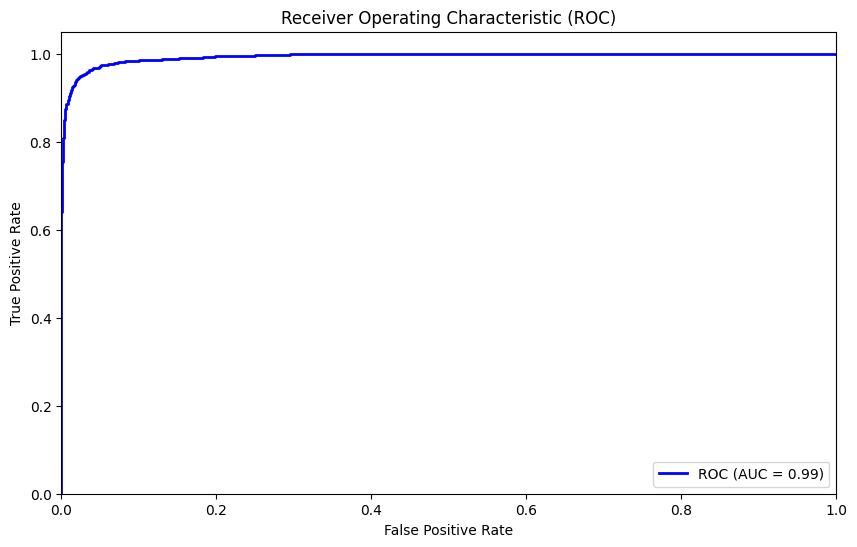

Epoch 1/10
469/469 [==============================] - 187s 399ms/step - loss: 1.0740 - accuracy: 0.6865 - val_loss: 0.8250 - val_accuracy: 0.8204
Epoch 2/10
469/469 [==============================] - 185s 394ms/step - loss: 1.0067 - accuracy: 0.7006 - val_loss: 0.7529 - val_accuracy: 0.8297
Epoch 3/10
469/469 [==============================] - 187s 399ms/step - loss: 0.9420 - accuracy: 0.7156 - val_loss: 0.6944 - val_accuracy: 0.8395
Epoch 4/10
469/469 [==============================] - 186s 396ms/step - loss: 0.8904 - accuracy: 0.7303 - val_loss: 0.6472 - val_accuracy: 0.8475
Epoch 5/10
469/469 [==============================] - 185s 395ms/step - loss: 0.8494 - accuracy: 0.7419 - val_loss: 0.6078 - val_accuracy: 0.8543
Epoch 6/10
469/469 [==============================] - 191s 407ms/step - loss: 0.8150 - accuracy: 0.7501 - val_loss: 0.5756 - val_accuracy: 0.8603
Epoch 7/10
469/469 [==============================] - 187s 399ms/step - loss: 0.7803 - accuracy: 0.7604 - val_loss: 0.5472 -

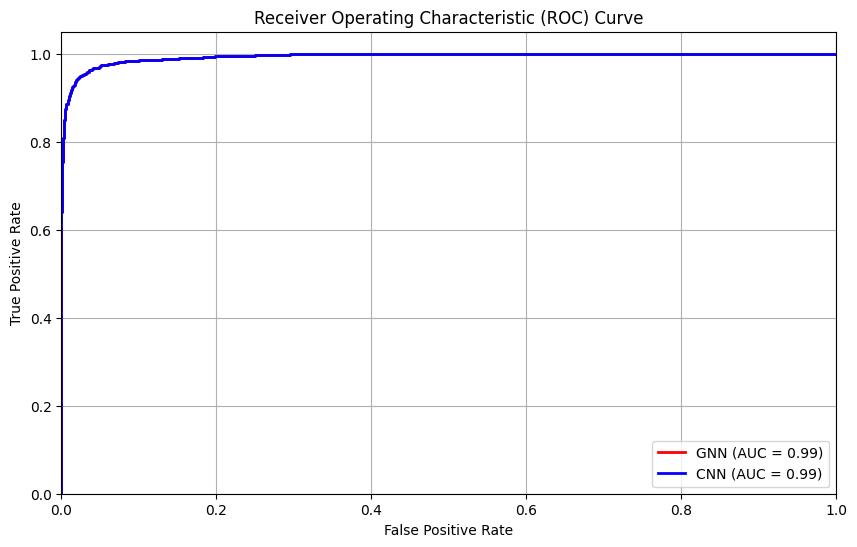

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf

# Define your GNN code here

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# ... (previous code remains the same)

plt.figure()

for i, dataset in enumerate(datasets):
    # Chargement du dataset
    dataset = read_dataset(dataset)

    # Division du dataset en ensembles d'entraînement et de test
    train_dataset, test_dataset = split_dataset(dataset)

    # Définition des dimensions d'entrée, cachée et de sortie du GNN
    input_dim = len(dataset[0][0])
    hidden_dim = 32
    output_dim = 2

    # Création du modèle GNN
    model = GraphNeuralNetwork(input_dim, hidden_dim, output_dim)

    # Entraînement du modèle
    num_epochs = 100
    learning_rate = 0.01
    train_model(model, train_dataset, num_epochs, learning_rate)

    # Évaluation du modèle
    evaluate_model(model, test_dataset)

    # Préparation des données de test
    x_test, y_test = prepare_data(test_dataset)

    # Calcul des scores de probabilité
    with torch.no_grad():
        outputs = model(torch.eye(x_test.size(0)), x_test)
        prob_scores = torch.softmax(outputs, dim=1)
        prob_scores = prob_scores[:, 1].numpy()  # Utilisez les scores de la classe positive

    # Calcul des taux de faux positifs et des taux de vrais positifs
    fpr, tpr, _ = roc_curve(y_test, prob_scores)

    # Calcul de l'aire sous la courbe ROC
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    # Affichage de la courbe ROC avec le nom du graphe dans la légende
    plt.plot(fpr, tpr, color=colors[i], lw=2, label='ROC {} (AUC = {:.2f})'.format(graph_names[i], roc_auc))

# ... (previous code remains the same)

# Affichage des légendes, axes, et AUCs
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Creating the legend inside the plot area
plt.legend(loc='lower right')

plt.tight_layout()  # To adjust the spacing and avoid overlapping
plt.show()


# Load the data for CNN
x_train_cnn = 'donnees_sante0.csv'

# Define the CNN model here
import tensorflow as tf
from sklearn.metrics import roc_curve, auc, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Définir le chemin du fichier dans votre Google Drive
x_train = 'donnees_sante0.csv'

# Définir les paramètres du modèle
num_classes = 10  # nombre de classes d'images
input_shape = (28, 28, 1)  # dimensions de l'image en entrée (28x28 pixels, niveau de gris)

# Créer le modèle séquentiel
model = tf.keras.models.Sequential()

# Ajouter une couche de convolution
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Ajouter une autre couche de convolution
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Ajouter une couche de mise en commun (pooling)
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Ajouter une couche de régularisation de surapprentissage (dropout)
model.add(tf.keras.layers.Dropout(0.25))

# Ajouter une couche de mise en forme (flatten)
model.add(tf.keras.layers.Flatten())

# Ajouter une couche dense (fully connected)
model.add(tf.keras.layers.Dense(128, activation='relu'))

# Ajouter une autre couche de régularisation de surapprentissage (dropout)
model.add(tf.keras.layers.Dropout(0.5))

# Ajouter la couche de sortie avec la fonction d'activation softmax
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compiler le modèle avec la fonction de perte, l'optimiseur et les métriques d'évaluation
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()

# Charger les données d'entraînement et de test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Prétraiter les données en les normalisant et en les redimensionnant
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Remplacer les étiquettes "Normal" par 0 et "Critical" par 1 dans y_train
y_train[y_train == "Normal"] = 0
y_train[y_train == "Critical"] = 1

# Remplacer les étiquettes "Normal" par 0 et "Critical" par 1 dans y_test
y_test[y_test == "Normal"] = 0
y_test[y_test == "Critical"] = 1

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Convertir les étiquettes en type entier
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Entraîner le modèle sur les données d'entraînement
batch_size = 128
epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Évaluer le modèle sur les données de test
y_pred = model.predict(x_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_test_classes = tf.argmax(y_test, axis=1)

# Calculer les métriques pour une seule classe
class_index = 0  # Indice de la classe choisie
y_test_class = y_test[:, class_index]
y_pred_class = y_pred[:, class_index]
fpr, tpr, _ = roc_curve(y_test_class, y_pred_class)
roc_auc = auc(fpr, tpr)

# Calculer les métriques
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')
error_rate = 1 - accuracy_score(y_test_classes, y_pred_classes)

print('Recall:', recall)
print('F1 Score:', f1)
print('Error Rate:', error_rate)

# Afficher la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC (AUC = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



# Fit the model to the training data for CNN
batch_size_cnn = 128
epochs_cnn = 10
model.fit(x_train, y_train, batch_size=batch_size_cnn, epochs=epochs_cnn, verbose=1, validation_data=(x_test, y_test))

# Evaluate the model on the test data for CNN
y_pred_cnn = model.predict(x_test)
y_pred_classes_cnn = tf.argmax(y_pred_cnn, axis=1)
y_test_classes_cnn = tf.argmax(y_test, axis=1)

# Calculate the ROC curve for CNN
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_class, y_pred_class)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# Calculate the metrics for CNN
recall_cnn = recall_score(y_test_classes_cnn, y_pred_classes_cnn, average='macro')
f1_cnn = f1_score(y_test_classes_cnn, y_pred_classes_cnn, average='macro')
error_rate_cnn = 1 - accuracy_score(y_test_classes_cnn, y_pred_classes_cnn)

print('Recall (CNN):', recall_cnn)
print('F1 Score (CNN):', f1_cnn)
print('Error Rate (CNN):', error_rate_cnn)

# Plot the ROC curves for both models in the same figure
plt.figure(figsize=(10, 6))

# Plot the ROC curve for GNN
plt.plot(fpr, tpr, color='red', lw=2, label='GNN (AUC = {:.2f})'.format(roc_auc))

# Plot the ROC curve for CNN
plt.plot(fpr_cnn, tpr_cnn, color='blue', lw=2, label='CNN (AUC = {:.2f})'.format(roc_auc_cnn))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Accuracy: 0.8317307692307693
Precision: 0.7991429959015423
Recall: 0.8317307692307693
F1 Score: 0.8114235847759461


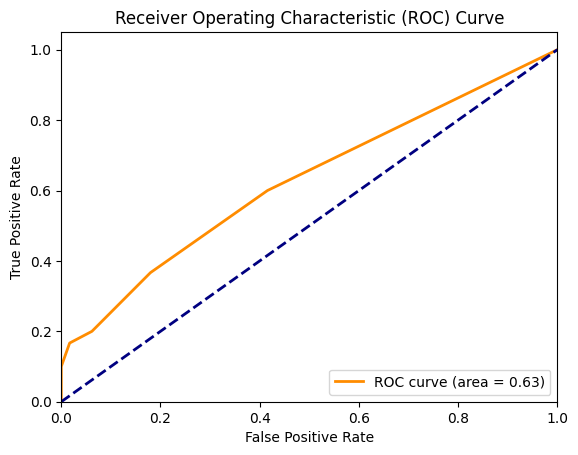

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Charger les données depuis le fichier CSV
data_df = pd.read_csv("NF.csv")

# Séparer les fonctionnalités (X) et les étiquettes de classe (y)
X = data_df.drop("Class", axis=1)
y = data_df["Class"]

# Convertir les étiquettes de classe en numériques
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Créer et entraîner le modèle KNN
k = 5  # Nombre de voisins
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Prédire les classes sur l'ensemble de test
y_pred = knn_model.predict(X_test)

# Calculer les métriques de performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculer et afficher la courbe ROC
y_prob = knn_model.predict_proba(X_test)  # Probabilités de prédiction
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Epoch [1/50], Loss: 229.73194885253906
Epoch [2/50], Loss: 26455.28515625
Epoch [3/50], Loss: 5724.7099609375
Epoch [4/50], Loss: 2444.0390625
Epoch [5/50], Loss: 4719.25830078125
Epoch [6/50], Loss: 6344.5859375
Epoch [7/50], Loss: 7429.64501953125
Epoch [8/50], Loss: 8112.2490234375
Epoch [9/50], Loss: 8477.818359375
Epoch [10/50], Loss: 8574.9091796875
Epoch [11/50], Loss: 8447.7216796875
Epoch [12/50], Loss: 8149.63818359375
Epoch [13/50], Loss: 7705.9677734375
Epoch [14/50], Loss: 6976.5361328125
Epoch [15/50], Loss: 5954.85009765625
Epoch [16/50], Loss: 4632.07421875
Epoch [17/50], Loss: 3068.097412109375
Epoch [18/50], Loss: 1340.131591796875
Epoch [19/50], Loss: 4984.3525390625
Epoch [20/50], Loss: 1156.9112548828125
Epoch [21/50], Loss: 996.1986694335938
Epoch [22/50], Loss: 1658.21533203125
Epoch [23/50], Loss: 2144.31982421875
Epoch [24/50], Loss: 2439.37841796875
Epoch [25/50], Loss: 2560.732177734375
Epoch [26/50], Loss: 2529.34326171875
Epoch [27/50], Loss: 2365.025390625

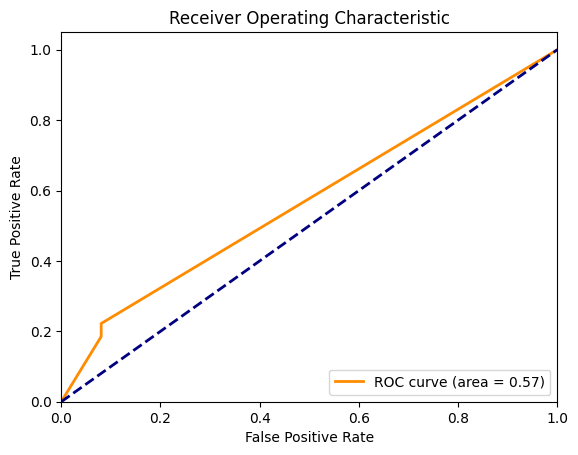

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Lecture du dataset à partir du fichier CSV
data_df = pd.read_csv("NetFlow1.csv")

# Créer un dictionnaire pour mapper les adresses IP aux numéros de nœuds
ip_to_node = {}
node_counter = 0

# Créer les nœuds et les arêtes avec attributs d'arête
edge_index = []
edge_attributes = []

for i in range(len(data_df)):
    src_ip = data_df.iloc[i]["SrcAddr"]
    dst_ip = data_df.iloc[i]["DstAddr"]

    if src_ip not in ip_to_node:
        ip_to_node[src_ip] = node_counter
        node_counter += 1
    if dst_ip not in ip_to_node:
        ip_to_node[dst_ip] = node_counter
        node_counter += 1

    src_node = ip_to_node[src_ip]
    dst_node = ip_to_node[dst_ip]

    edge_index.append([src_node, dst_node])  # Ajouter la paire de nœuds à la liste des arêtes

edge_index = torch.tensor(edge_index, dtype=torch.long).T

# Séparer les caractéristiques (X) et les étiquettes de classe (y)
X = data_df.iloc[:, 2:-1].values.astype(np.float32)
y = data_df["Class"].values

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir les étiquettes de classe en valeurs numériques
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Définition du modèle GNN
class GraphNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphNeuralNetwork, self).__init__()
        self.conv1 = nn.Linear(input_dim, hidden_dim)
        self.conv2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, edge_index, node_features):
        h1 = torch.relu(self.conv1(node_features))
        h2 = self.conv2(h1)
        return h2

# Créer le modèle GNN
input_dim = X.shape[1]
hidden_dim = 64
output_dim = len(np.unique(y))
model = GraphNeuralNetwork(input_dim, hidden_dim, output_dim)

# Définir la fonction de perte et l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Entraîner le modèle
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    logits = model(None, torch.tensor(X_train, dtype=torch.float32))
    loss = criterion(logits, torch.tensor(y_train_encoded, dtype=torch.int64))
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Évaluer le modèle
model.eval()
with torch.no_grad():
    logits = model(None, torch.tensor(X_test, dtype=torch.float32))
    predicted_labels = torch.argmax(logits, dim=1)

    accuracy = accuracy_score(y_test_encoded, predicted_labels)
    precision = precision_score(y_test_encoded, predicted_labels, average='weighted')
    recall = recall_score(y_test_encoded, predicted_labels, average='weighted')
    f1 = f1_score(y_test_encoded, predicted_labels, average='weighted')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Calcul et affichage de la courbe ROC
    prob_positive_class = torch.softmax(logits, dim=1)[:, 1]  # Probabilité de la classe positive

    fpr, tpr, _ = roc_curve(y_test_encoded, prob_positive_class)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


In [12]:
pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 14.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=85f48d26168bd8f99f0a386627be4b6d13b56d96927aef85b22e35fff37de9a8
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch-geometric
